In [1]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
os.listdir(r"C:\Users\DEVADHARSHINI K\Downloads\Data\train-20240302T140802Z-001\train")
os.listdir(r"C:\Users\DEVADHARSHINI K\Downloads\Data\test-20240302T140801Z-001\test")

['benign', 'malignant']

In [3]:
import tensorflow as tf
import os
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.applications.resnet50 import ResNet50
train_dir=r"C:\Users\DEVADHARSHINI K\Downloads\Data\train-20240302T140802Z-001\train"
test_dir=r"C:\Users\DEVADHARSHINI K\Downloads\Data\test-20240302T140801Z-001\test"
label=["'malignant","benign"]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
train_dir=r"C:\Users\DEVADHARSHINI K\Downloads\Data\train-20240302T140802Z-001\train"
test_dir=r"C:\Users\DEVADHARSHINI K\Downloads\Data\test-20240302T140801Z-001\test"

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='training')

val_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='validation')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 2118 images belonging to 2 classes.
Found 529 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [6]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

Malignant Images:


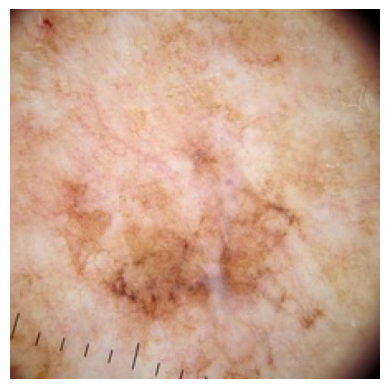

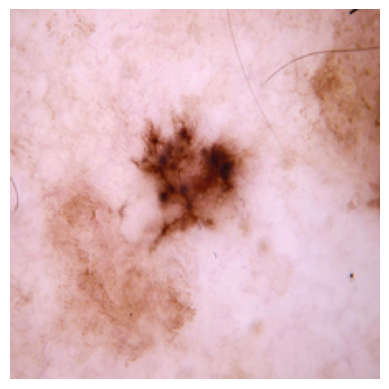

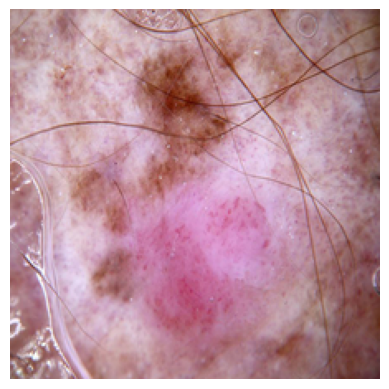

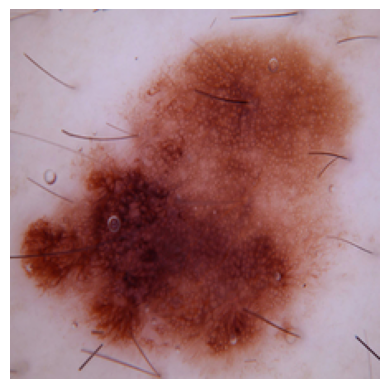

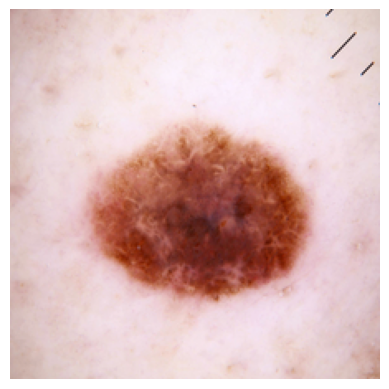

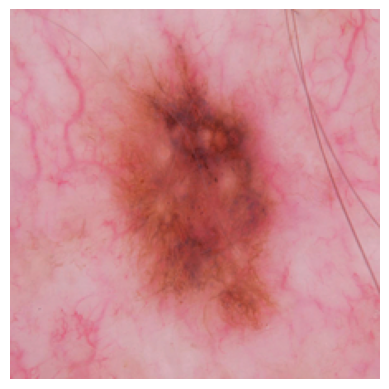

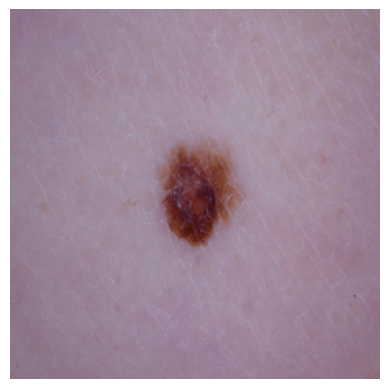

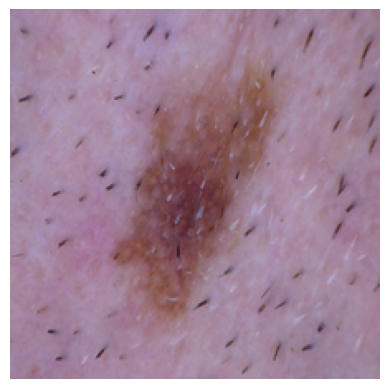

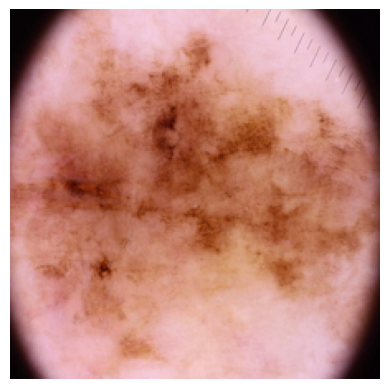

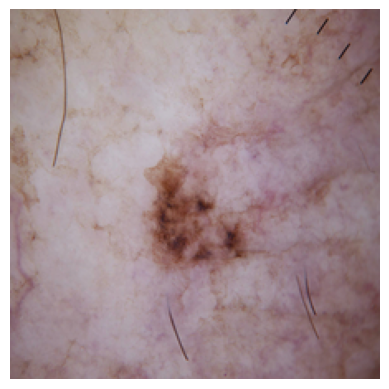

Benign Images:


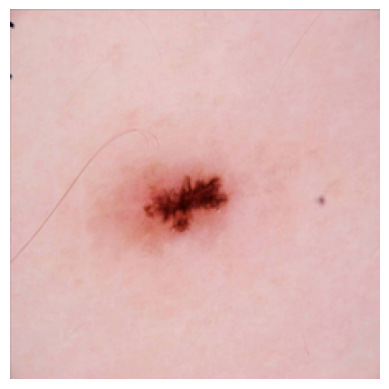

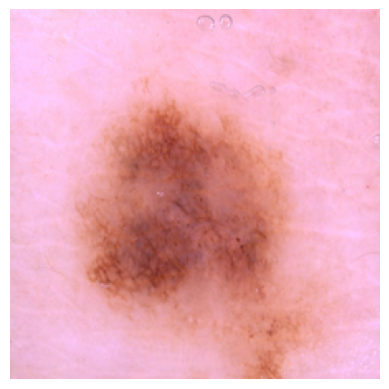

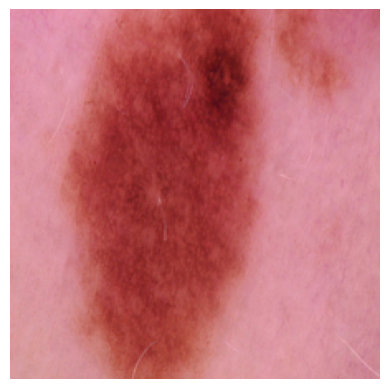

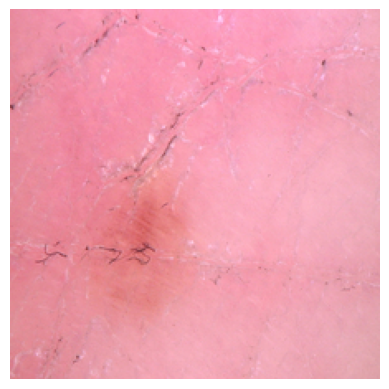

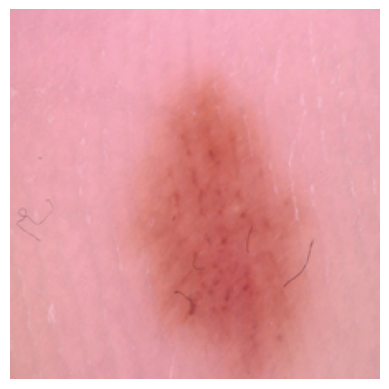

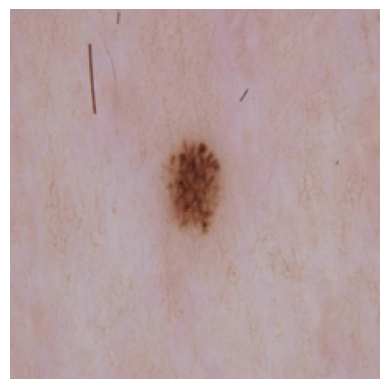

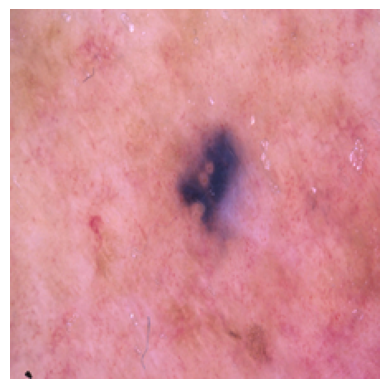

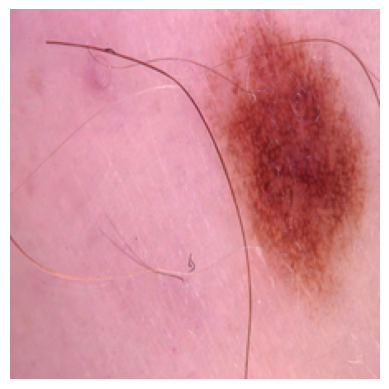

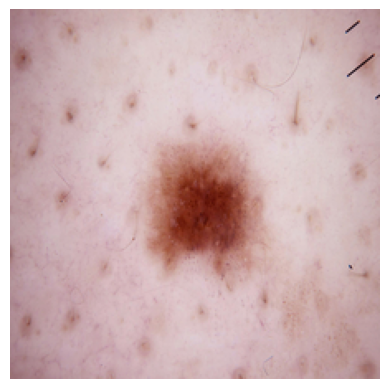

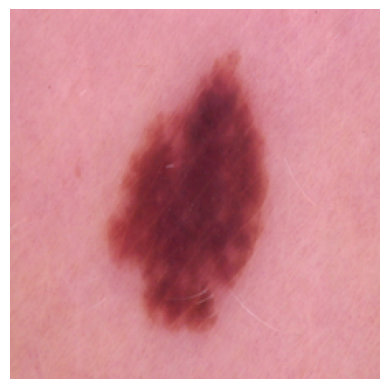

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Set the path to the dataset
data_path = r"C:\Users\DEVADHARSHINI K\Downloads\Data\test-20240302T140801Z-001\test"

# Define the classes
classes = ['malignant', 'benign']

# Print 10 images of each class
for cls in classes:
    cls_path = os.path.join(data_path, cls)
    cls_images = os.listdir(cls_path)[:10]
    print(f"{cls.capitalize()} Images:")
    for img_file in cls_images:
        img_path = os.path.join(cls_path, img_file)
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    #print('\n')


In [8]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
#output layer fully connected dance layer with two neuron
predictions = Dense(2, activation='softmax')(x)

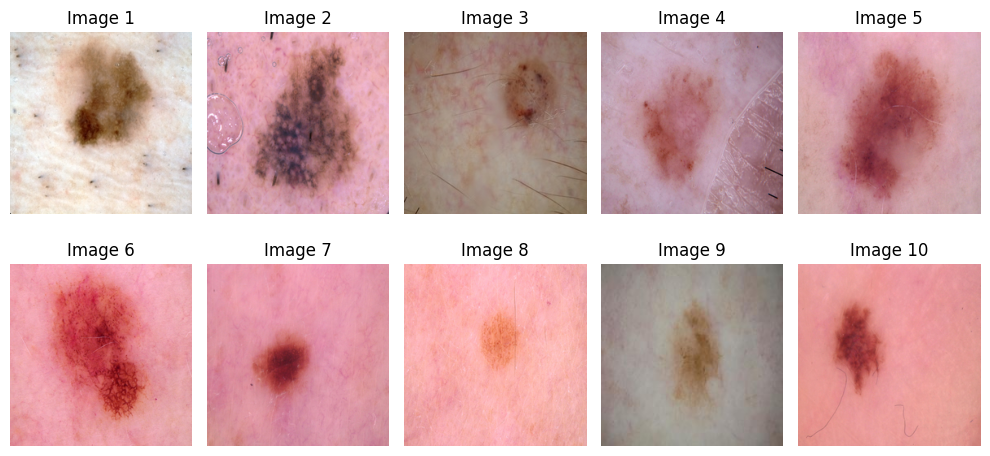

In [9]:
import matplotlib.pyplot as plt

# Get the first 10 images from the test generator
x_test, y_test = next(test_generator)
x_test_first10 = x_test[:10]

# Plot the first 10 images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test_first10[i])
    ax.set_title("Image {}".format(i+1))
    ax.axis('off')
plt.tight_layout()
plt.show()

In [10]:
model = Model(inputs=base_model.input, outputs=predictions)
#model.summary()
     

# Freeze all layers in the base ResNet50 model
for layer in base_model.layers[5:]:
    layer.trainable = False
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=train_generator.n // train_generator.batch_size, 
                              epochs=10, 
                              validation_data=val_generator, 
                              validation_steps=val_generator.n // val_generator.batch_size)

C:\Users\DEVADHARSHINI K\AppData\Local\Temp\ipykernel_17128\3466116329.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
66/66 [==============================] - 600s 9s/step - loss: 5.5337 - accuracy: 0.7867 - val_loss: 0.7412 - val_accuracy: 0.5391
Epoch 2/10
66/66 [==============================] - 544s 8s/step - loss: 0.3889 - accuracy: 0.8293 - val_loss: 0.7601 - val_accuracy: 0.5391
Epoch 3/10
66/66 [==============================] - 544s 8s/step - loss: 0.3406 - accuracy: 0.8466 - val_loss: 1.1636 - val_accuracy: 0.5449
Epoch 4/10
66/66 [==============================] - 543s 8s/step - loss: 0.2998 - accuracy: 0.8514 - val_loss: 1.5213 - val_accuracy: 0.5391
Epoch 5/10
66/66 [==============================] - 559s 8s/step - loss: 0.3214 - accuracy: 0.8547 - val_loss: 0.9806 - val_accuracy: 0.5469
Epoch 6/10
66/66 [==============================] - 584s 9s/step - loss: 0.2853 - accuracy: 0.8749 - val_loss: 1.1955 - val_accuracy: 0.5410
Epoch 7/10
66/66 [==============================] - 532s 8s/step - loss: 0.2678 - accuracy: 0.8581 - val_loss: 1.1150 - val_accuracy: 0.5449
Epoch 8/10
66

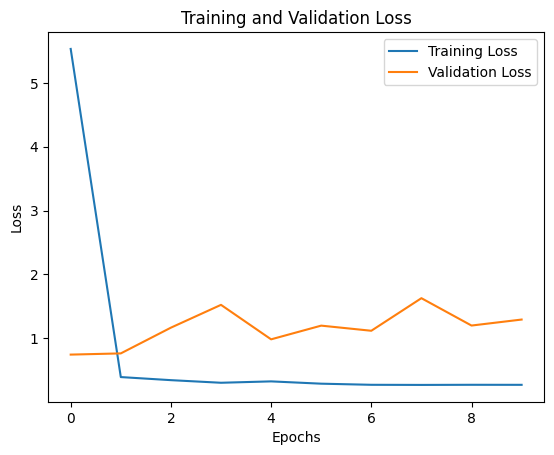

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


21/21 - 27s - loss: 1.2776 - accuracy: 0.6061 - 27s/epoch - 1s/step
Test Accuracy: 0.6060606241226196
Train Loss: 0.26733434200286865
Test Loss: 1.2776222229003906
Test Accuracy: 0.6060606241226196


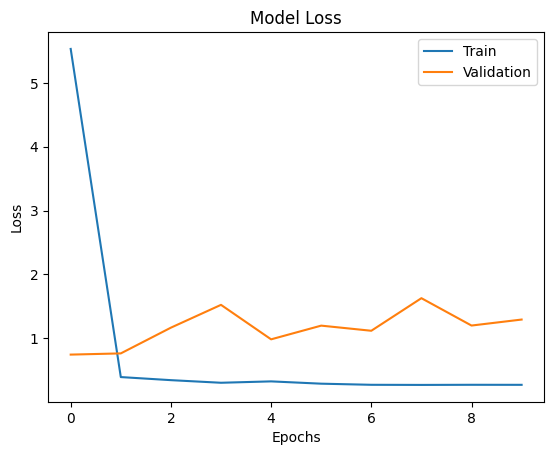

In [14]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Test Accuracy:', test_acc)
# Print the train and test loss
print('Train Loss:', history.history['loss'][-1])
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
# Plot the train and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


21/21 - 28s - loss: 1.2776 - accuracy: 0.6061 - 28s/epoch - 1s/step
Test Accuracy: 0.6060606241226196


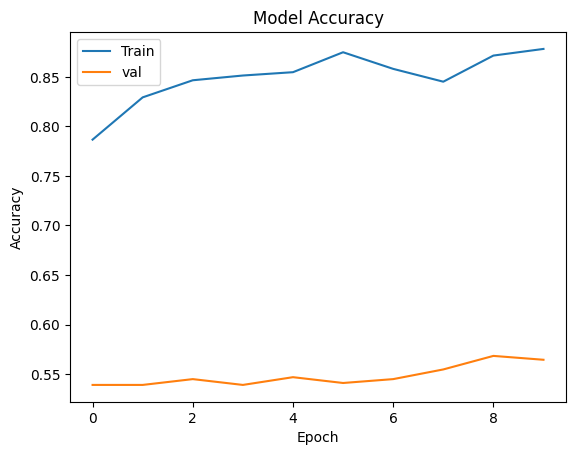

In [16]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Test Accuracy:', test_acc)

# Plot the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 1s 1s/step


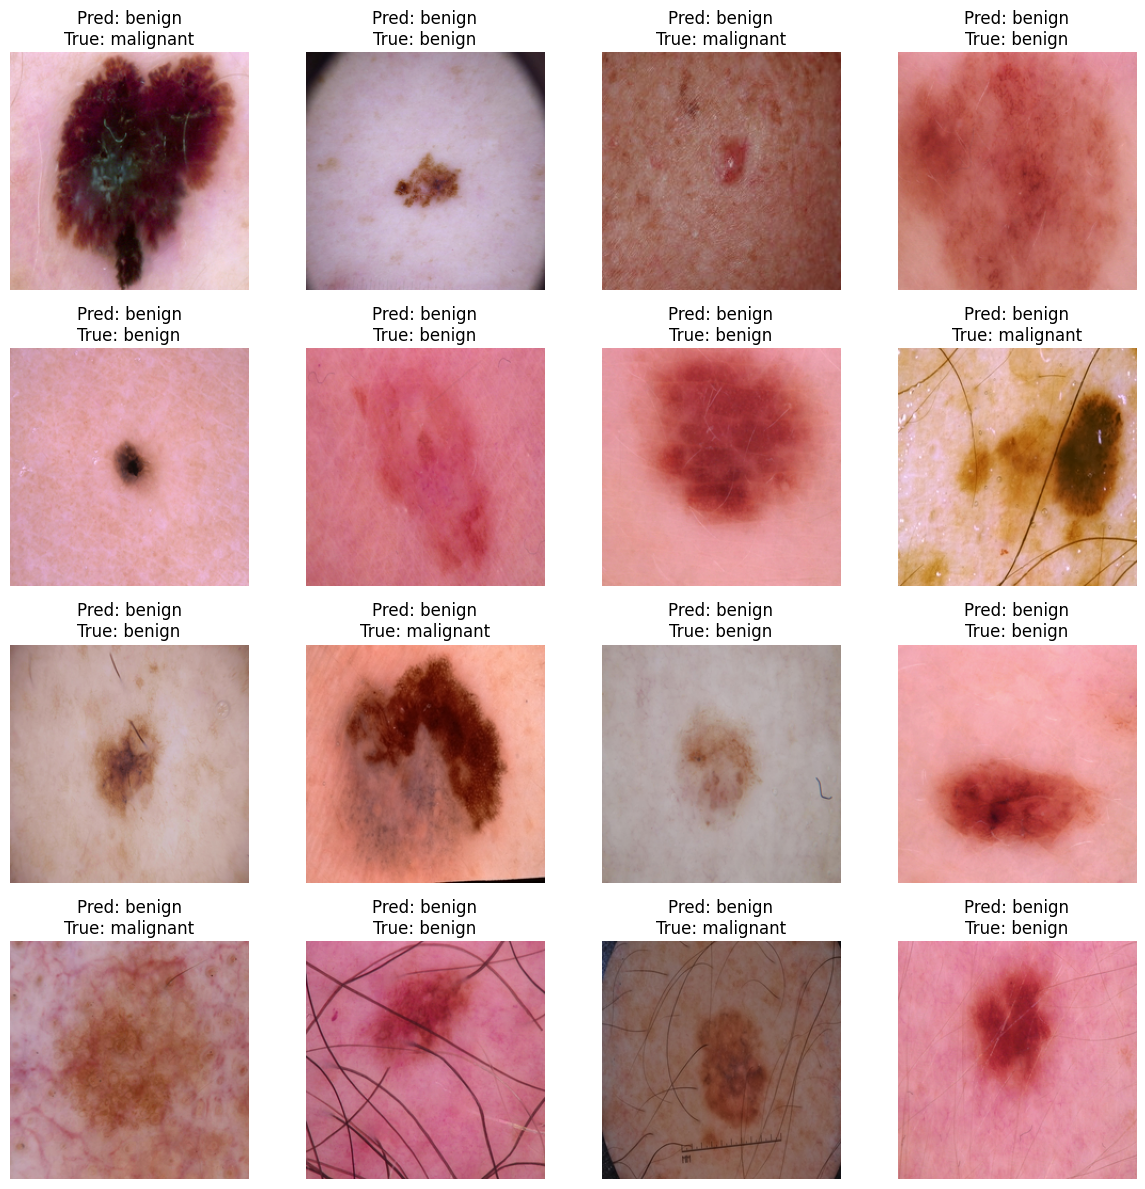

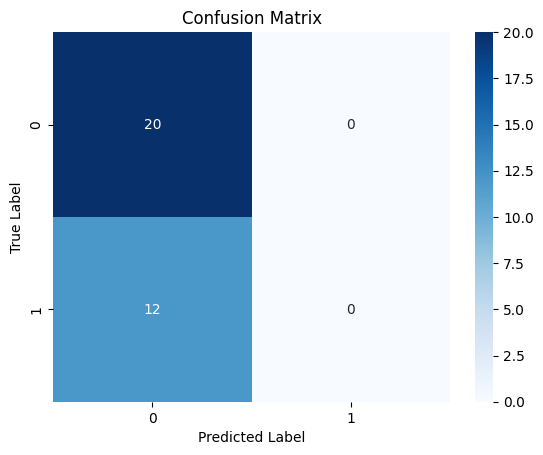

In [17]:
import matplotlib.pyplot as plt

# Get the next batch of images from the test generator
x_test, y_test = next(test_generator)

# Predict the classes of the testing data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
label_dict = {0: 'benign', 1: 'malignant'}

# Plot the images along with their predicted and actual labels
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12,12))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i])
    pred_label = label_dict[y_pred_classes[i]]
    true_label = label_dict[y_true_classes[i]]
    ax.set_title("Pred: {}\nTrue: {}".format(pred_label, true_label))
    ax.axis('off')
plt.tight_layout()
plt.show()
     

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()